In [8]:
#https://www.upgrad.com/blog/markov-chain-in-python-tutorial/#Principle_of_Markov_Chain_Markov_Property

In [4]:
def make_markov_matrix(input_sequence: str) -> np.matrix:
    """
    Returns markov matrix based on the input sequence,

          A      T      G      C
        A P(AA)  P(AT)  P(AG)  P(AC)
        T P(TA)  P(TT)  P(TG)  P(TC)
        G P(GA)  P(GT)  P(GG)  P(GC)
        C P(CA)  P(CT)  P(CG)  P(CC)

        where P(AA) is the probability of A following an A.

    Args:
        input_sequence: Input sequence.

    Returns:
        Markov matrix as 4x4 np.matrix with propabilities of nucleotide pairs.

    Raises:
        ValueError: input_string contains characters other than ATGC.
    """
    pass

In [56]:
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [45]:
seq = "AAATGGCTAGBAGTA"
seq2 = "AAATGGCTAGBAGTANNNNNNNNNNNAA"

In [5]:
#Issue = with count function from python, overlapping occurences are only counted once: AAA is only counted  once

def make_markov_matrix(seq: str):
    nucl = ["A","C","G","T"]

    # Possible nucleotide pairs
    comb =  [["AA","AC","AG","AT"],
            ["CA","CC","CG","CT"],
            ["GA","GC","GG","GT"],
            ["TA","TC","TG","TT"]]
    result = np.zeros((4,4))
    
    #count occurence of nucleotide pairs:
    for i in range(len(nucl)): #i represents the row 
        for j in range(len(nucl)): #j represents the column
            a = seq.count(comb[i][j])
            result[i,j] = a
            a = 0
            
    #convert occurence to probabilities
    for i in range(len(nucl)): #i represents the row 
        tot = np.sum(result[i])
        for j in range(len(nucl)): #j represents the column
            prob = result[i,j]/tot
            result[i,j] = prob
            
    #check if probabilities are correct
    tot = 0
    for i in range(len(nucl)): #i represents the row 
        tot = tot + np.sum(result[i])
        if tot == i+1:
            d = 0
        else: 
            result = f'Imhonogenous probability distribution for the {nucl[i]} nucleotides'
            break

    return result
        

   
    
    

In [6]:
def CountOccurrences(string, substring): 
  
    # Initialize count and start to 0 
    count = 0
    start = 0
  
    # Search through the string till 
    # we reach the end of it 
    while start < len(string): 
  
        # Check if a substring is present from 
        # 'start' position till the end 
        pos = string.find(substring, start) 
  
        if pos != -1: 
            # If a substring is present, move 'start' to 
            # the next position from start of the substring 
            start = pos + 1
  
            # Increment the count 
            count += 1
        else: 
            # If no further substring is present 
            break
    # return the value of count 
    return count 

In [7]:
#uses countoccurences function - found on google- to count overlapping occurences
#works with sequences containing N

def make_markov_matrix2(seq: str):
    nucl = ["A","C","G","T"]

    # Possible nucleotide pairs
    comb =  [["AA","AC","AG","AT"],
            ["CA","CC","CG","CT"],
            ["GA","GC","GG","GT"],
            ["TA","TC","TG","TT"]]
    result = np.zeros((4,4))
    
    #count occurence of nucleotide pairs:
    for i in range(len(nucl)): #i represents the row 
        for j in range(len(nucl)): #j represents the column
            a = CountOccurrences(seq, comb[i][j])
            result[i,j] = a

            a = 0
            
    #convert occurence to probabilities
    for i in range(len(nucl)): #i represents the row 
        tot = np.sum(result[i])
        for j in range(len(nucl)): #j represents the column
            prob = result[i,j]/tot
            result[i,j] = prob
            
    #check if probabilities are correct
    tot = 0
    for i in range(len(nucl)): #i represents the row 
        tot = tot + np.sum(result[i])
        if i+0.99 <= tot <= i+1.01 :
            d = 0
        else: 
            result = f'Imhonogenous probability distribution for the {nucl[i]} nucleotides'
            break

    return result
        

   
    
    

In [8]:
def Markov_check (Generated_array, Seq_array, treshhold):
    #Array shape
    comb =  [["AA","AC","AG","AT"],
            ["CA","CC","CG","CT"],
            ["GA","GC","GG","GT"],
            ["TA","TC","TG","TT"]]
    #Used nucleotides
    nucl = ["A","C","G","T"]
    #Output error list
    Errorlist = []
    #Error treshold
    treshold = treshold
    treshhold

In [114]:
def Markov_check (Generated_array, Seq_array, treshold):
    #Input: arrays with nucleotide frequences in a 4x4 array
    #Output: String giving the nucleotide pairs with a frequency deviation higher than the specified treshold
    #Array shape
    comb =  [["AA","AC","AG","AT"],
            ["CA","CC","CG","CT"],
            ["GA","GC","GG","GT"],
            ["TA","TC","TG","TT"]]
    #Used nucleotides
    nucl = ["A","C","G","T"]
    #Output error list
    Errorlist = []
    #Error treshold
    treshold = treshold
    treshold_per = round((treshold - 1) * 100,1)

    #Division of original markov array (seq array) used to generate the sequence (generated array) to calculate freq difference
    Dev_array = np.divide(Generated_array, Seq_array)
    
    #checking for more than 5% variation in dinucleotide occurences
    for i in range(len(nucl)): #i represents the row 
        for j in range(len(nucl)): #j represents the column
            if Dev_array[i][j] >= treshold-1:
                Errorlist.append(comb[i][j])
            else:
                d = 0
    
    if not Errorlist :
        Markov_check = f'There is not more than a {treshold_per}% deviation in the frequences of the computed nucleotide string with comparison to the original dataset'
    else:
        Markov_check = f'There is more than a {treshold_per}% deviation in the frequences of the following nucleotides: {Errorlist}'
        
    
    return Markov_check
            
    

    

In [108]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [115]:
def Markov_check_graphical (Generated_array, Seq_array):
    #Input: nucleotide frequences in a 4x4 array
    #Output: heatmap of frequency errors
    #Array shape
    comb =  [["AA","AC","AG","AT"],
            ["CA","CC","CG","CT"],
            ["GA","GC","GG","GT"],
            ["TA","TC","TG","TT"]]
    #Used nucleotides
    nucl = ["A","C","G","T"]


    #Division of original markov array (seq array) used to generate the sequence (generated array) to calculate freq difference
    Dev_array = np.divide(Generated_array, Seq_array) 
    Dev_array_subtr = np.subtract(Dev_array,np.ones((4,4)))
    
    #Matplotlib to have a graphical representation of the errors
    fig, ax = plt.subplots()
    im, cbar = heatmap(Dev_array_subtr, nucl, nucl, ax=ax,
                   cmap="YlGn", cbarlabel="Frequency error")
    
    return im
            
    

    

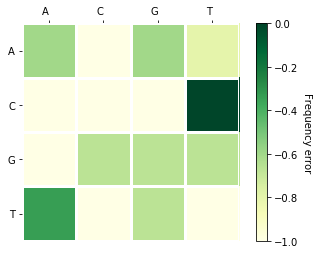

In [116]:
a = make_markov_matrix2(seq)
b = np.ones((4,4))
c= Markov_check_graphical (a, b)
plt.show(c)